In [14]:
# main imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel, ConstantKernel

# 1. Generate some synthetic data with a known period t=24h

In [15]:
np.random.seed(42)

period = 24 # For example, if we know the period is 24 hours
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = np.sin(X * (2 * np.pi / period)) + 0.5 * np.random.randn(*X.shape)  # Period of 24 hours with noise

# 2. Define the Gaussian Process Kernel
* We use the **ExpSineSquared** kernel for periodicity.
* The `periodicity` parameter is set to our known period.
* `length_scale` controls the smoothness of the periodic function.
* `length_scale_bounds` can be set to constrain its optimization.
* We also add a **WhiteKernel** for noise and a **ConstantKernel** for the overall amplitude.

In [16]:
kernel = (ConstantKernel(1.0, (1e-3, 1e3)) *
          ExpSineSquared(length_scale=1.0, periodicity=period,
                         length_scale_bounds=(0.1, 10.0),
                         periodicity_bounds="fixed") + # "fixed" means not optimized
          WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1)))

# This kernel combines a constant kernel, a periodic kernel, and a noise kernel.

# 3. Initialize and fit the Gaussian Process Regressor

In [17]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0,
                              optimizer="fmin_l_bfgs_b", n_restarts_optimizer=10)
gp.fit(X, y)

# Print the optimized kernel parameters
print("Optimized Kernel Parameters:")
print(gp.kernel_)

Optimized Kernel Parameters:
0.695**2 * ExpSineSquared(length_scale=1.33, periodicity=24) + WhiteKernel(noise_level=0.213)


# 4. Make predictions

In [18]:
X_pred = np.linspace(0, 10, 500).reshape(-1, 1)
y_pred, sigma = gp.predict(X_pred, return_std=True)

# 5. Plot the results

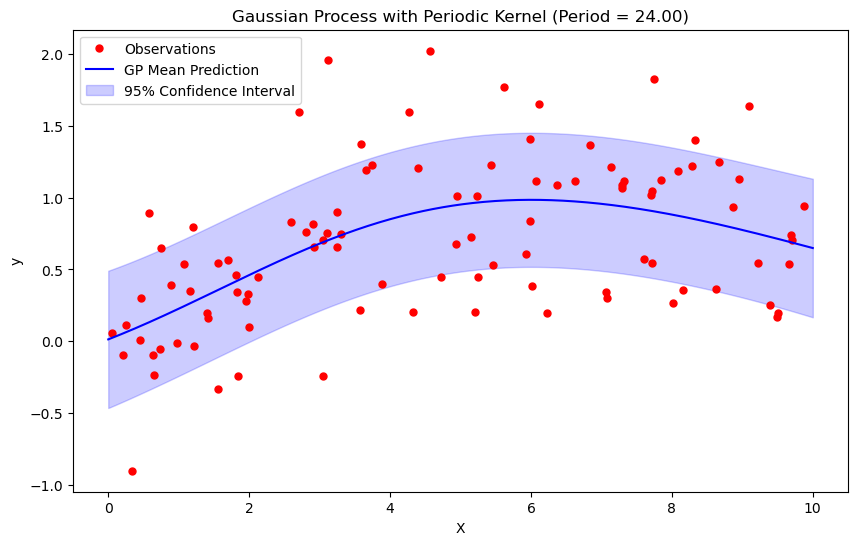

Log-marginal likelihood: -70.332


In [22]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(X_pred, y_pred, 'b-', label='GP Mean Prediction')
plt.fill_between(X_pred.flatten(), y_pred - sigma, y_pred + sigma,
                 alpha=0.2, color='b', label='95% Confidence Interval')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Gaussian Process with Periodic Kernel (Period = {period:.2f})")
plt.legend()
plt.show()

# You can also check the log-marginal likelihood of the fitted model
print(f"Log-marginal likelihood: {gp.log_marginal_likelihood(gp.kernel_.theta):.3f}")